# Kurapati Venkatesh
# 09012021
# Topic: Association Rules

# ---------------------------------------------------------------------------

## 3. A film distribution company wants to target audience based on their likes and dislikes, you as a Chief Data Scientist Analyze the data and come up with different rules of movie list so that the business objective is achieved.

## -----------------------------------------------------------------------------------

### Business objective: To help the film distribution company to know more about target audience based on their likes and dislikes which helps in increase in footfall of audience and provide ways the business can improve exponentially, apply Association Rule Algorithm, explain the rules, and visualize the graphs for clear understanding of solution.

## -------------------------------------------------------------------------------------------

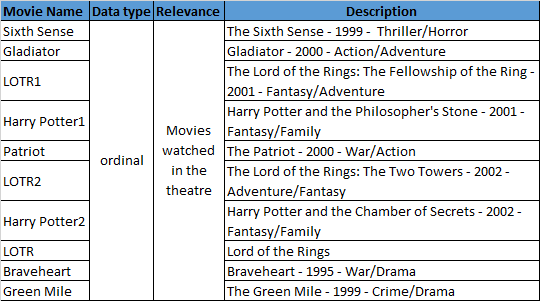

Import libraries:

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mlxtend'

Load Dataset:

In [ ]:
df1 = pd.read_csv("G:\\360digit\\assignments meterial\\association rules\\my_movies.csv", sep=',') 
df = df1[df1.columns[5:15]]

Print rows: 

In [ ]:
df.columns[:5]

Each row of the dataset represents movies viewed on the same day at the same theatre.

There are only 10 movies in total that make up the entire dataset.

In [17]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


### Applying Apriori:

In [76]:
freq_items = apriori(df, min_support = 0.00075, max_len = 4, use_colnames = True, verbose=1)
freq_items.head(10)

Processing 84 combinations | Sampling itemset size 4


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


#### Mining Association Rules:

#### Most Frequent item sets based on support:

In [77]:
freq_items.sort_values('support', ascending = False, inplace = True)

<ipython-input-74-16a0ffc2cde6>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')


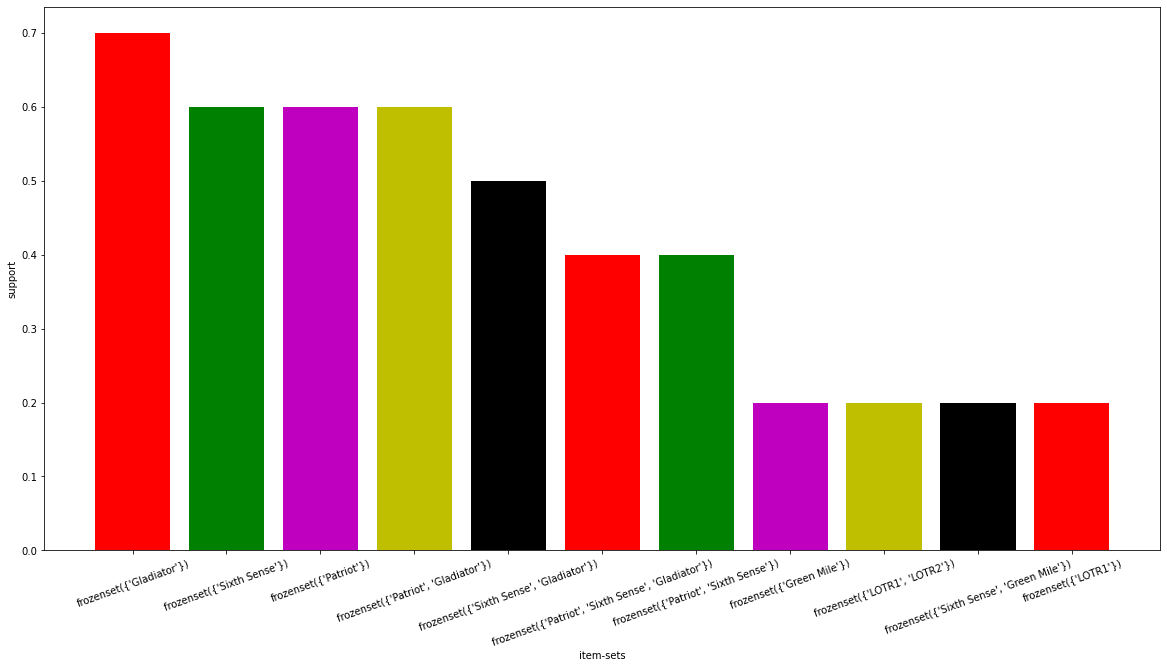

In [74]:
plt.bar(x = list(range(0, 11)), height = freq_items.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), freq_items.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

Gladiator is the highly viewedliked movie among all the movies.

In [81]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head(20)
rules.sort_values('confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
70,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
81,"(Sixth Sense, LOTR, Green Mile)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
80,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
79,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
78,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
77,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
76,"(Sixth Sense, Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf
75,"(LOTR1, Green Mile, LOTR2)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
74,"(Sixth Sense, LOTR2, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf


The result of association analysis shows, if audience like the antecedents, they tend to like the consequents.

## Analysis of Rules:

##### Let's say we are ony interested in rules that satisfy the following criteria:

##### 1. at least 2 antecedents
##### 2. a confidence > 0.75
##### 3. a lift score > 10

##### all the movies have equal oppurtunity to view

###### 1.  Rules -  4, 5, 6 and 7 are satisfied with our criteria. These rules strongly indicates that if either part of LOTR is viewed, then with 100% confidence the other part of the LOTR will also be viewed. 
###### 2.  If the movie rating and genre are in dataset, then the resulting rules will be better.
###### 3. Rule1 indicates that, if the movie Patroit is viewed then with a support of 0.6, will be viewed.

##### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizing results:

#### 1. Support vs Confidence:

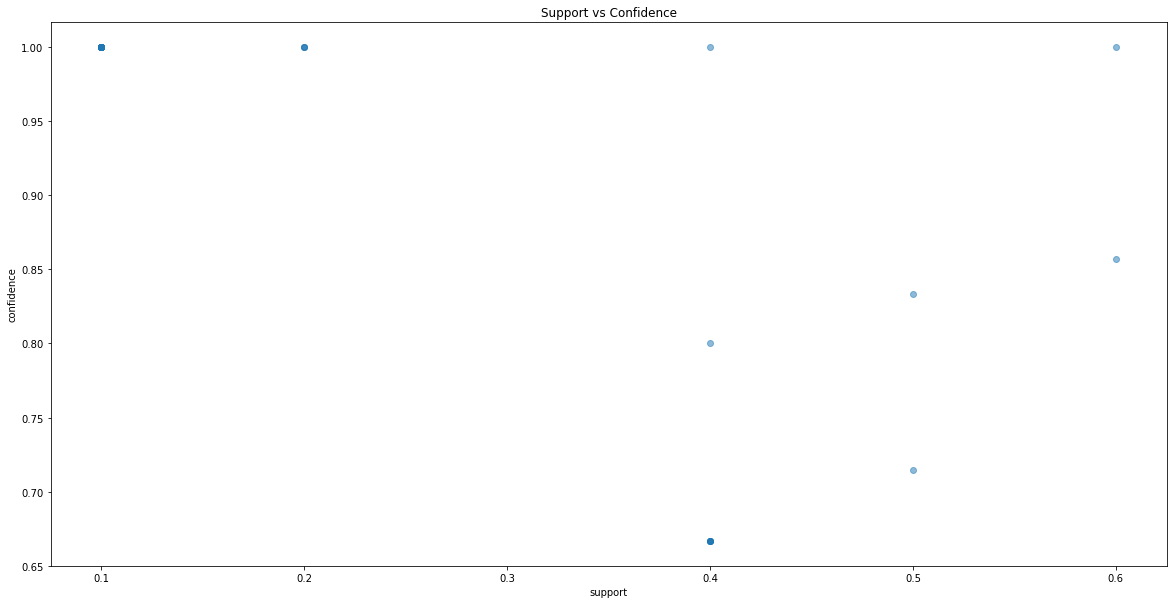

In [91]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

###### Above Scatter plot represents null, dispersed and no correlation between Support and Confidence.

#### 2. Support vs Lift:

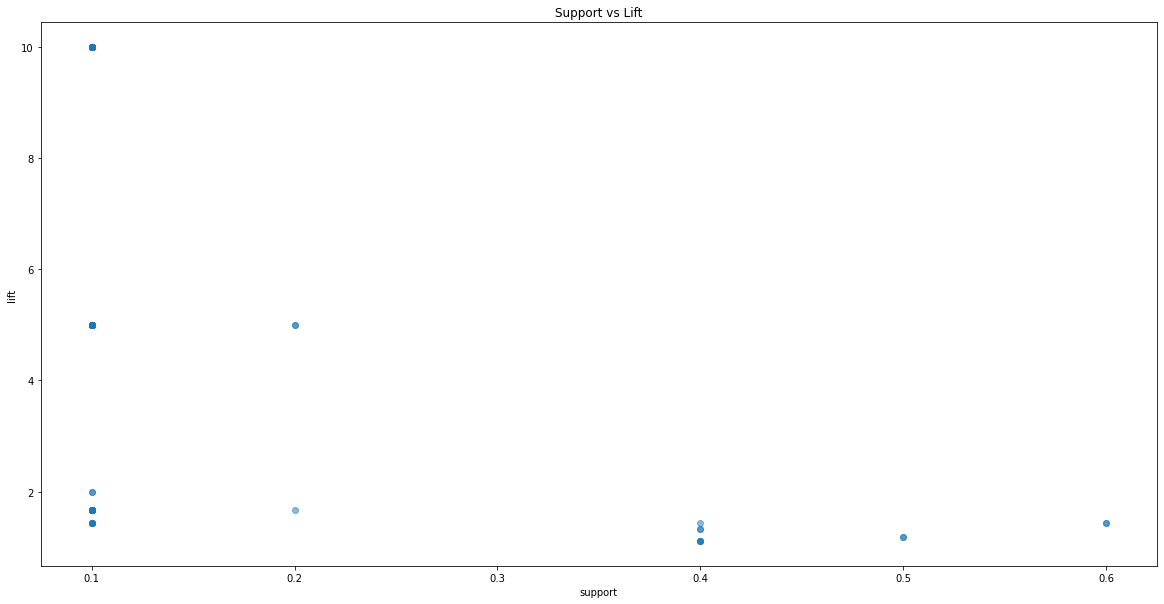

In [92]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

###### Above Scatter plot represents no correlation between Support and Lift. 

#### 3. Lift vs Confidence:

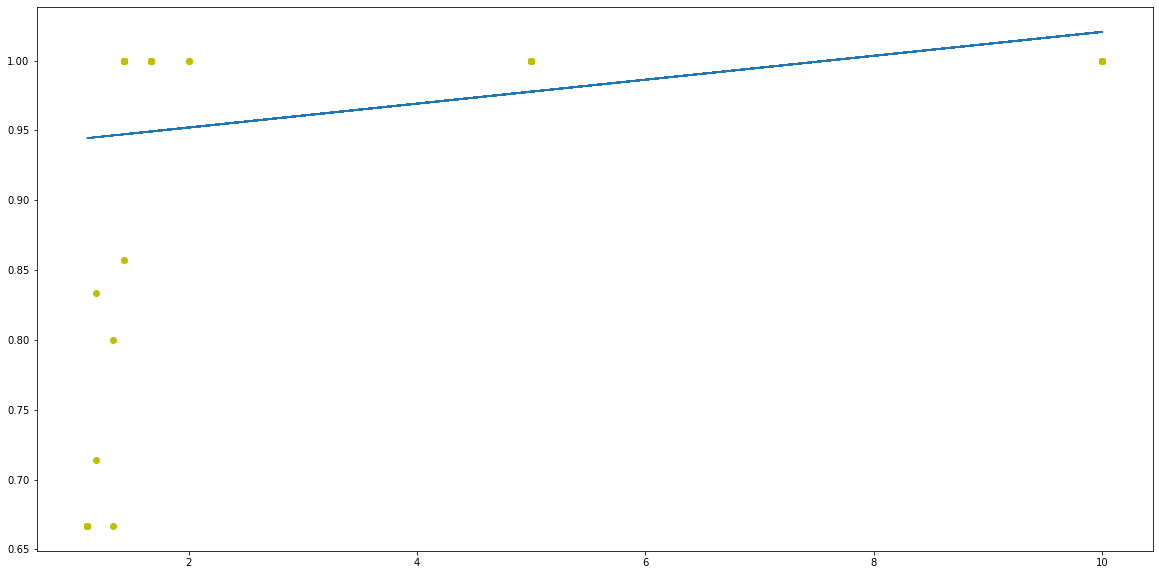

In [93]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

###### Mathematically it is not the best fit to the data. Above Scatter plot represents weak and no correlation between Lift and Confidence. There is an outliers present in the plot.

### --------------------EXTRA PART-------------------------

In [94]:
def to_list(i):
    return (sorted(list(i)))

In [95]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)

In [96]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [97]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

#### Getting rules without any redudancy: 

In [98]:
rules_no_redudancy = rules.iloc[index_rules, :]

#### Sorting them with respect to list and getting top 10 rules:

In [99]:
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(Sixth Sense, Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
41,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
99,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
68,"(LOTR1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
36,"(Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
32,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
100,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
58,"(Sixth Sense, Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
34,"(Sixth Sense, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
53,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf


##### Recommendations:

From rules 4, 6, 7 and 10, it's clear that the person who views either part of the series, tend to watch other part (Harry potter1 - harry potter 2 and LOTR1 - LOTR2). 
From the above table it is clear that, in most purchases the consequent is Reference Book. So, it is Recommendable that the shop should maintain the Reference Books stock all the time. 